In [1]:
import jieba
import urllib.request
import matplotlib.pyplot as plt
import math
import csv

In [2]:
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def format_str(content):
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str + ｉ
    return content_str

In [6]:
#url = 'https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt'
f = open("./NLP_HW02_Result/movies.csv",'r',encoding="utf-8")
m = 0 #行數
txt = ''
num_of_words_in_lines = [] #每一行的字詞數
save_all_word = []
fre_of_line = [] #每一行出現的字詞與對應的出現次數
word_name = {}
myCsvDic = csv.DictReader(f)
for line in myCsvDic:
    items = []
    convert = format_str(line['劇情介紹'])
    words  = jieba.cut(convert, cut_all=False)
    line_fre = {}
    line_word_num = 0
    for word in words:
        line_fre[word] = line_fre.get(word,0) + 1
        word_name[word] = word_name.get(word,0) + 1
        line_word_num = line_word_num + 1
        #if len(save_all_word)==0:
        #    save_all_word.append(word)
        #else:
        #    for i in save_all_word:
        #        if i==word:
        #            break
        #        else:
        #            save_all_word.append(word)
    items = list(line_fre.items())  
    items.sort(key=lambda x:x[1], reverse=True)
    fre_of_line += (items, )
    num_of_words_in_lines += (line_word_num, )
    m = m+1
for i in range(0,10):
    print(fre_of_line[i])

print(m)
f.close

[('的', 18), ('他', 10), ('喬治', 6), ('也', 5), ('生活', 4), ('卻', 4), ('在', 3), ('但是', 3), ('販毒', 3), ('了', 3), ('一個', 3), ('一生', 2), ('都', 2), ('美國', 2), ('享受', 2), ('富裕', 2), ('只是', 2), ('是', 2), ('靠', 2), ('著', 2), ('賺', 2), ('為', 2), ('大', 2), ('勢力', 2), ('認識', 2), ('狄亞哥', 2), ('把', 2), ('艾斯', 2), ('科巴', 2), ('女兒', 2), ('開始', 2), ('戎格', 1), ('追求', 1), ('所謂', 1), ('夢', 1), ('就是', 1), ('美好', 1), ('不願', 1), ('像', 1), ('父親', 1), ('那樣', 1), ('一輩子', 1), ('個', 1), ('出賣', 1), ('勞力', 1), ('建築', 1), ('工人', 1), ('於', 1), ('搬', 1), ('到', 1), ('陽光', 1), ('明媚', 1), ('加州', 1), ('販賣', 1), ('大麻', 1), ('錢', 1), ('起初', 1), ('自由自在', 1), ('當他', 1), ('野心', 1), ('越來', 1), ('越', 1), ('日益', 1), ('坐大之際', 1), ('此時', 1), ('被捕', 1), ('入獄', 1), ('牢裡', 1), ('能言善道', 1), ('自稱', 1), ('熟識', 1), ('哥倫比亞', 1), ('集團', 1), ('牢友', 1), ('出獄', 1), ('後', 1), ('果真', 1), ('當時', 1), ('最大', 1), ('毒', 1), ('梟', 1), ('介紹給', 1), ('計畫將', 1), ('古柯', 1), ('鹼', 1), ('大量', 1), ('引進', 1), ('迪斯可', 1), ('舞廳', 1), ('希望', 1), ('能', 1), ('引領', 1),

<function TextIOWrapper.close()>

In [7]:
print(word_name)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
for i in range(10):
    print(save_all_word[i])

喬治
戎格
一生
都
在
追求
所謂
的
美國
夢


TF

In [5]:
tfscore = 0
for i in range(m):
    for j in range(len(fre_of_line[i])):
        tf = fre_of_line[i][j][1] / num_of_words_in_lines[i]
        fre_of_line[i][j] += (tf, )
for i in range(10):
    print(fre_of_line[i])

[('分類', 21, 0.8076923076923077), ('名稱', 1, 0.038461538461538464), ('上映', 1, 0.038461538461538464), ('日期', 1, 0.038461538461538464), ('劇情', 1, 0.038461538461538464), ('介紹', 1, 0.038461538461538464)]
[('的', 18, 0.07758620689655173), ('他', 10, 0.04310344827586207), ('喬治', 6, 0.02586206896551724), ('也', 5, 0.021551724137931036), ('生活', 4, 0.017241379310344827), ('卻', 4, 0.017241379310344827), ('在', 3, 0.01293103448275862), ('但是', 3, 0.01293103448275862), ('販毒', 3, 0.01293103448275862), ('了', 3, 0.01293103448275862), ('一個', 3, 0.01293103448275862), ('狂野', 2, 0.008620689655172414), ('一生', 2, 0.008620689655172414), ('都', 2, 0.008620689655172414), ('美國', 2, 0.008620689655172414), ('享受', 2, 0.008620689655172414), ('富裕', 2, 0.008620689655172414), ('只是', 2, 0.008620689655172414), ('是', 2, 0.008620689655172414), ('靠', 2, 0.008620689655172414), ('著', 2, 0.008620689655172414), ('賺', 2, 0.008620689655172414), ('為', 2, 0.008620689655172414), ('大', 2, 0.008620689655172414), ('勢力', 2, 0.0086206896551724

In [6]:
word_num_of_line = {}
for j in range(m):
    for k in range(len(fre_of_line[j])):
        word_num_of_line[fre_of_line[j][k][0]] = word_num_of_line.get(fre_of_line[j][k][0],0) + 1

出現行數

In [7]:
for j in range(m):
    for k in range(len(fre_of_line[j])):
        fre_of_line[j][k] += (word_num_of_line[fre_of_line[j][k][0]], )
for i in range(10):
    print(fre_of_line[i])

[('分類', 21, 0.8076923076923077, 7), ('名稱', 1, 0.038461538461538464, 22), ('上映', 1, 0.038461538461538464, 1082), ('日期', 1, 0.038461538461538464, 63), ('劇情', 1, 0.038461538461538464, 4003), ('介紹', 1, 0.038461538461538464, 216)]
[('的', 18, 0.07758620689655173, 16559), ('他', 10, 0.04310344827586207, 6437), ('喬治', 6, 0.02586206896551724, 70), ('也', 5, 0.021551724137931036, 6529), ('生活', 4, 0.017241379310344827, 2764), ('卻', 4, 0.017241379310344827, 5352), ('在', 3, 0.01293103448275862, 10346), ('但是', 3, 0.01293103448275862, 1154), ('販毒', 3, 0.01293103448275862, 33), ('了', 3, 0.01293103448275862, 8435), ('一個', 3, 0.01293103448275862, 4014), ('狂野', 2, 0.008620689655172414, 67), ('一生', 2, 0.008620689655172414, 563), ('都', 2, 0.008620689655172414, 4553), ('美國', 2, 0.008620689655172414, 1282), ('享受', 2, 0.008620689655172414, 330), ('富裕', 2, 0.008620689655172414, 62), ('只是', 2, 0.008620689655172414, 1016), ('是', 2, 0.008620689655172414, 8432), ('靠', 2, 0.008620689655172414, 362), ('著', 2, 0.008620

In [8]:
def idf(m,fre):
    return math.log(m/fre)

IDF

In [9]:
for i in range(m):
    for j in range(len(fre_of_line[i])):
        fre_of_line[i][j] += (idf(m,fre_of_line[i][j][3]), )
for i in range(10):
    print(fre_of_line[i])

[('分類', 21, 0.8076923076923077, 7, 8.447475567563808), ('名稱', 1, 0.038461538461538464, 22, 7.302343263260806), ('上映', 1, 0.038461538461538464, 1082, 3.4068192572126947), ('日期', 1, 0.038461538461538464, 63, 6.250250990227589), ('劇情', 1, 0.038461538461538464, 4003, 2.0985863576265484), ('介紹', 1, 0.038461538461538464, 216, 5.018107308934956)]
[('的', 18, 0.07758620689655173, 16559, 0.6787006769766375), ('他', 10, 0.04310344827586207, 6437, 1.6235678445665058), ('喬治', 6, 0.02586206896551724, 70, 6.144890474569762), ('也', 5, 0.021551724137931036, 6529, 1.6093766454324883), ('生活', 4, 0.017241379310344827, 2764, 2.468951531731561), ('卻', 4, 0.017241379310344827, 5352, 1.8081601148110573), ('在', 3, 0.01293103448275862, 10346, 1.1490304660556614), ('但是', 3, 0.01293103448275862, 1154, 3.342396269551077), ('販毒', 3, 0.01293103448275862, 33, 6.896878155152641), ('了', 3, 0.01293103448275862, 8435, 1.3532407216390532), ('一個', 3, 0.01293103448275862, 4014, 2.0958421872628383), ('狂野', 2, 0.00862068965517

TF-IDF

In [10]:
for i in range(m):
    for j in range(len(fre_of_line[i])):
        fre_of_line[i][j] += (fre_of_line[i][j][2]*fre_of_line[i][j][4], )
for i in range(10):
    print(fre_of_line[i])

[('分類', 21, 0.8076923076923077, 7, 8.447475567563808, 6.822961035339999), ('名稱', 1, 0.038461538461538464, 22, 7.302343263260806, 0.2808593562792618), ('上映', 1, 0.038461538461538464, 1082, 3.4068192572126947, 0.13103150989279597), ('日期', 1, 0.038461538461538464, 63, 6.250250990227589, 0.24039426885490728), ('劇情', 1, 0.038461538461538464, 4003, 2.0985863576265484, 0.08071485990871341), ('介紹', 1, 0.038461538461538464, 216, 5.018107308934956, 0.1930041272667291)]
[('的', 18, 0.07758620689655173, 16559, 0.6787006769766375, 0.052657811144739115), ('他', 10, 0.04310344827586207, 6437, 1.6235678445665058, 0.06998137261062526), ('喬治', 6, 0.02586206896551724, 70, 6.144890474569762, 0.15891958123887318), ('也', 5, 0.021551724137931036, 6529, 1.6093766454324883, 0.03468484149638983), ('生活', 4, 0.017241379310344827, 2764, 2.468951531731561, 0.04256812985744071), ('卻', 4, 0.017241379310344827, 5352, 1.8081601148110573, 0.03117517439329409), ('在', 3, 0.01293103448275862, 10346, 1.1490304660556614, 0.014

In [11]:
tmp_all = []

for i in range(m):
    for j in range(len(fre_of_line[i])):
        tmp_all.append((fre_of_line[i][j]))

for i in range(10):
    print(tmp_all[i])

('分類', 21, 0.8076923076923077, 7, 8.447475567563808, 6.822961035339999)
('名稱', 1, 0.038461538461538464, 22, 7.302343263260806, 0.2808593562792618)
('上映', 1, 0.038461538461538464, 1082, 3.4068192572126947, 0.13103150989279597)
('日期', 1, 0.038461538461538464, 63, 6.250250990227589, 0.24039426885490728)
('劇情', 1, 0.038461538461538464, 4003, 2.0985863576265484, 0.08071485990871341)
('介紹', 1, 0.038461538461538464, 216, 5.018107308934956, 0.1930041272667291)
('的', 18, 0.07758620689655173, 16559, 0.6787006769766375, 0.052657811144739115)
('他', 10, 0.04310344827586207, 6437, 1.6235678445665058, 0.06998137261062526)
('喬治', 6, 0.02586206896551724, 70, 6.144890474569762, 0.15891958123887318)
('也', 5, 0.021551724137931036, 6529, 1.6093766454324883, 0.03468484149638983)


In [12]:
tmp_all.sort(key=lambda x:x[5], reverse=True)
for i in range(100):
    print(tmp_all[i])

('關於極落', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於角頭', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('紅圈', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於幕後團隊', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('炎上', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('性別絮語', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('創投會議', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('牙醫篇', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('梁哲夫', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於野梨樹', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('母嬰靈', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('揚科馬薩分', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('五忠仔', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於導演', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('喬坎拉佛斯', 1, 1.0, 2, 9.700238536059176, 9.700238536059176)
('小論述', 1, 1.0, 2, 9.700238536059176, 9.700238536059176)
('小導讀', 1, 1.0, 2, 9.700238536059176, 9.70023853

TF-IDF 權重TOP100

In [13]:
tfidf_top100 = []
num = 0
n = 0
while(num<=100):
    check = 0
    for j in range(num):
        if num!=0:
            if tmp_all[n][0] == tfidf_top100[j][0]:
                n = n+1
                check = 1
                break
    if check == 0:
        tfidf_top100.append(tmp_all[n])
        n = n+1
        num = num+1

for i in range(100):
    print(tfidf_top100[i])

('關於極落', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於角頭', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('紅圈', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於幕後團隊', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('炎上', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('性別絮語', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('創投會議', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('牙醫篇', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('梁哲夫', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於野梨樹', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('母嬰靈', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('揚科馬薩分', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('五忠仔', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('關於導演', 1, 1.0, 1, 10.393385716619122, 10.393385716619122)
('喬坎拉佛斯', 1, 1.0, 2, 9.700238536059176, 9.700238536059176)
('小論述', 1, 1.0, 2, 9.700238536059176, 9.700238536059176)
('小導讀', 1, 1.0, 2, 9.700238536059176, 9.70023853

頻率top100

In [14]:
tmp_all.sort(key=lambda x:(x[1]/x[4]), reverse=True)

In [15]:
fretop100 = []
getnum = 0
n = 0
while(getnum<=100):
    check2 = 0
    for j in range(getnum):
        if getnum!=0:
            if tmp_all[n][0] == fretop100[j][0]:
                n = n+1
                check2 = 1
                break
    if check2 == 0:
        fretop100.append(tmp_all[n])
        n = n+1
        getnum = getnum+1

In [16]:
def draw1(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Weight')
    plt.title('tf-idf') # 設定圖表標題
    plt.show()
def draw2(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Freq')
    plt.title('Fre') # 設定圖表標題
    plt.show()

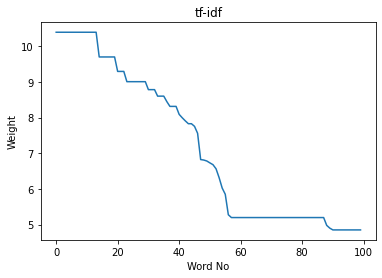

In [17]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(tfidf_top100[i][5])

draw1(x_label, y_label)